# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from re import sub
from decimal import Decimal
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
    
%matplotlib notebook


In [2]:
def read_and_merge_datasets(dict_datasets):
    """
    Reads in all of the datasets, merges them and cleans them
    :param dict_datasets:  Dictionaty of income datasets of common format {file_path: keyword_list}
        keyword_list has the form ['dataset_type, dataset column names, column_name_suffix]
        column_name_suffix only applies when dataset_type == 'income'
    """
    
    # Initialize empty DataFrame
    df = pd.DataFrame()
    
    # Loop through dictionary
    for data_file, keyword in dict_datasets.items():
        # Read dataset, skipping all headers and name the columns
        data = pd.read_table(data_file, skiprows=2, delim_whitespace=True, names=keyword[1], index_col=0)
        # Rename the columns before a merge if from the 'income' family
        if keyword[0] == 'income':
            col_rename_dict = {}
            for col in keyword[1]:
                if col != 'Year':
                    col_rename_dict[col] = col + ' ' + keyword[2]
            data = data.rename(columns=col_rename_dict)
        # merge the DataFrames if the main DataFrame is not empty
        if df.empty:
            df = data.copy()
        # Merge with inner join to get the intersection of all data based on Date
        else:
            df = df.merge(data, how='inner', left_index=True, right_index=True)
    
    # Convert all column values to float, removing the commas    
    df = df.replace('[^\d.]', '', regex=True).astype('float')
    
    # Sort the DataFrame by Year
    df = df.sort_index()
    
    return df

In [4]:
"""
Income datesets from http://www.deptofnumbers.com/income/michigan/ann-arbor/
GDP datasets from http://www.deptofnumbers.com/gdp/michigan/ 
"""

income_col_names = ('Year', 'US ($)', 'Mich ($)', 'Ann Arbor ($)')
per_cap_GDP_col_names = ('Year', 'US perCap GDP ($)', 'Mich perCap GDP ($)', 'Mich Pop.')
hist_real_GDP_col_names = ('Year', 'Mich GDP ($B)')
datasets = {'./Historical Inflation Adjusted Median Family Income for Ann Arbor.txt': 
            ['income',  income_col_names, 'IncFamily'],
            './Historical Real Per Capita Income for Ann Arbor.txt':
            ['income', income_col_names, 'IncPerCap'],
            './Historical Real GDP (2009 Chained Dollars) data for Michigan.txt':
            ['histGDP', hist_real_GDP_col_names],
            './Historical Real Per-Capita GDP (2009 Chained Dollars) and Population data for Michigan.txt':
            ['perCapGDP', per_cap_GDP_col_names]
           }

# Read and merge the data
df = read_and_merge_datasets(datasets)

df.head()

,US ($) IncFamily,Mich ($) IncFamily,Ann Arbor ($) IncFamily,US ($) IncPerCap,Mich ($) IncPerCap,Ann Arbor ($) IncPerCap,Mich GDP ($B),US perCap GDP ($),Mich perCap GDP ($),Mich Pop.
Year,,,,,,,,,,
2005,67761.0,69515.0,89266.0,30384.0,29588.0,37113.0,431.383,48062.0,42919.0,10051137.0
2006,68801.0,68178.0,89767.0,29703.0,28327.0,35323.0,423.582,48880.0,42206.0,10036081.0
2007,69929.0,68151.0,94887.0,30508.0,28368.0,35715.0,419.302,49126.0,41925.0,10001284.0
2008,69756.0,66728.0,90532.0,30371.0,27855.0,34202.0,396.515,48401.0,39863.0,9946889.0
2009,67476.0,62615.0,85889.0,29174.0,26212.0,32437.0,363.146,46680.0,36676.0,9901591.0


<IPython.core.display.Javascript object>


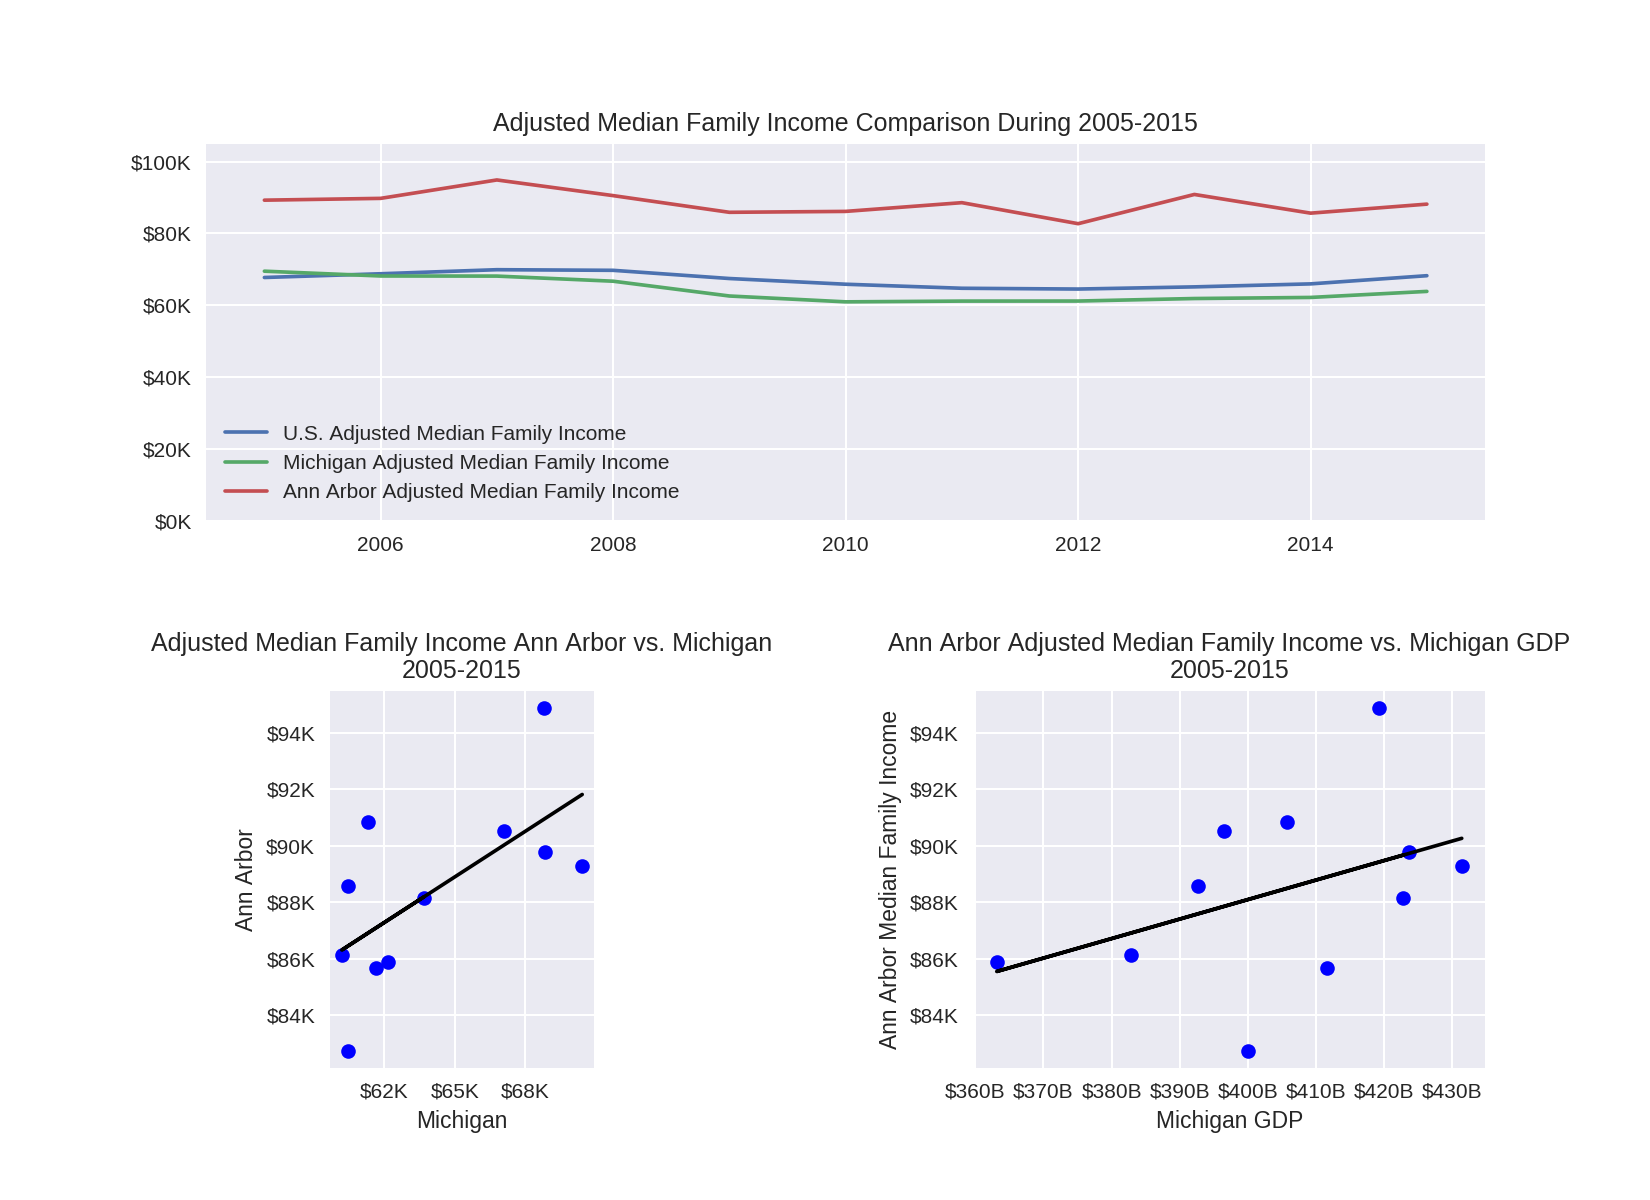

In [6]:
fig = plt.figure(figsize=(11, 8))
gspec = gridspec.GridSpec(2, 2)

# set the space between subplots and the position of the subplots in the figure
#gspec.update(wspace=0.4, hspace=0.45, left = 0.1, right = 0.7, bottom = 0.1, top = 0.9)
gspec.update(hspace=0.45, wspace=0.5)

# Set up plot axes
ax_by_year = plt.subplot(gspec[0, :])
ax_aa_vs_mich_income = plt.subplot(gspec[1, 0])
ax_aa_inc_vs_mich_per_cap = plt.subplot(gspec[1, 1])
axs = [ax_by_year, ax_aa_vs_mich_income, ax_aa_inc_vs_mich_per_cap]

# Function to format axis values as currency in thousands
def currency_thousands(y, pos):
    return '$%1.0fK' % (y/1000)

# Function to format axis values as currency in billions
def currency_billions(y, pos):
    return '$%1.0fB' % (y)

# Set the y-axis currency format for all plots
[ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(currency_thousands)) for ax in axs]

# Set the x-axis currency format for the "versus" plots
ax_aa_vs_mich_income.get_xaxis().set_major_formatter(ticker.FuncFormatter(currency_thousands))
ax_aa_inc_vs_mich_per_cap.get_xaxis().set_major_formatter(ticker.FuncFormatter(currency_billions))

# Plot vs. date
ax_by_year.plot(df.index, df['US ($) IncFamily'], label="U.S. Adjusted Median Family Income")
ax_by_year.plot(df.index, df['Mich ($) IncFamily'], label="Michigan Adjusted Median Family Income")
ax_by_year.plot(df.index, df['Ann Arbor ($) IncFamily'], label="Ann Arbor Adjusted Median Family Income")

# Beautify ax_by_year
ax_by_year.set_title('Adjusted Median Family Income Comparison During 2005-2015')
ax_by_year.legend(loc='best')
ax_by_year.set_ylim(0, df['Ann Arbor ($) IncFamily'].max()+10000)
[ax_by_year.spines[loc].set_visible(True) for loc in ['left', 'bottom']]

# Plot to see if correlation exists between family income from Ann Arbor and Michigan
x2 = df['Mich ($) IncFamily'].copy()
y2 = df['Ann Arbor ($) IncFamily'].copy()
fit2 = np.polyfit(x2, y2, 1)
fit2_fn = np.poly1d(fit2)
ax_aa_vs_mich_income.plot(x2, y2, 'bo', x2, fit2_fn(x2), '-k')
ax_aa_vs_mich_income.set_title('Adjusted Median Family Income Ann Arbor vs. Michigan\n2005-2015')
ax_aa_vs_mich_income.set_xlabel('Michigan')
ax_aa_vs_mich_income.set_ylabel('Ann Arbor')
ax_aa_vs_mich_income.set_aspect('equal')

# Plot to see if correlation exists between family income of Ann Arbor versus Michgan GDP
x3 = df['Mich GDP ($B)'].copy()
y3 = df['Ann Arbor ($) IncFamily'].copy()
fit3 = np.polyfit(x3, y3, 1)
fit3_fn = np.poly1d(fit3)
ax_aa_inc_vs_mich_per_cap.plot(x3, y3, 'bo', x3, fit3_fn(x3), '-k')
ax_aa_inc_vs_mich_per_cap.set_title('Ann Arbor Adjusted Median Family Income vs. Michigan GDP\n2005-2015')
ax_aa_inc_vs_mich_per_cap.set_xlabel('Michigan GDP')
ax_aa_inc_vs_mich_per_cap.set_ylabel('Ann Arbor Median Family Income')